In [24]:
#importing the required modues
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder # common utlity for data processing 
from sklearn.ensemble import RandomForestClassifier # Model to combine the predictions
from sklearn.metrics import confusion_matrix # Module for plotting confusion_matrix
from sklearn.model_selection import train_test_split # Module for splitting the data into train and test subsets 
from wordcloud import WordCloud # Module for Data Visualization 
import matplotlib.pyplot as plt # Module for Data Visualization(Plotting)
import seaborn as sns # Module for Graphics


In [3]:
nRowsRead = 100000 # specify 'None' if want to read whole file
initialDataFrame = pd.read_csv('Dataset.csv', delimiter=',', nrows = nRowsRead) # coping data into Dataframe.
initialDataFrame.dataframeName = 'Dataset.csv' #Assinging name 
nRow, nCol = initialDataFrame.shape #Getting the number of rows and columns
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 87 columns


In [4]:
initialDataFrame[:] # Displaying dataframe

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,192.168.205.131-10.200.7.6-54082-3128-6,10.200.7.6,3128,192.168.205.131,54082,6,26/04/201711:14:24,404,1,1,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
99996,10.200.7.217-91.216.63.241-37416-80-6,10.200.7.217,37416,91.216.63.241,80,6,26/04/201711:14:42,309,1,2,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
99997,172.217.29.69-10.200.7.194-443-35657-6,172.217.29.69,443,10.200.7.194,35657,6,26/04/201711:16:37,148,1,1,...,0.0,0,0,0.0,0.0,0,0,BENIGN,126,GOOGLE
99998,192.168.29.55-10.200.7.8-61690-3128-6,192.168.29.55,61690,10.200.7.8,3128,6,26/04/201711:15:31,82,1,2,...,0.0,0,0,0.0,0.0,0,0,BENIGN,126,GOOGLE


In [5]:
initialDataFrame.dropna(inplace = True) #Drop rows/column with null values 

In [6]:
initialDataFrame.drop(columns =["Timestamp", "Label"], inplace = True) #Drop columns Timestamp and Label
#We will generate our own labels later

In [7]:
initialDataFrame.columns #Listing Columns in Dataframe


Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.

In [8]:
dataFrame = initialDataFrame #Copy the Dataframe 


In [9]:
#Drop Sorce and Destination IP and Ports, they can be included when there is a requirment of regional classification 
dataFrame.drop(columns =["Source.IP", "Source.Port", "Destination.IP", "Destination.Port"], inplace = True) 
#As input datasets used is gathered from a single geographic location these fields add no siginificance to the study

In [10]:
labelEncoder = LabelEncoder() #creating a lable encoder object
#inserting colunm-"label" with encoded values of Protocol Name
dataFrame["labels"] = labelEncoder.fit_transform(dataFrame["ProtocolName"]) 
archiveFrame = dataFrame[["ProtocolName", "labels"]]
archiveFrame = archiveFrame.drop_duplicates(keep='first')#Removing Duplicates
archiveFrame.to_csv('ProtocolsAndLabels.csv') #Backing up ProtolNames and labels for future reference
print(archiveFrame)

         ProtocolName  labels
0          HTTP_PROXY      18
2                HTTP      15
7        HTTP_CONNECT      16
8                 SSL      30
9              GOOGLE      13
36            YOUTUBE      39
100          FACEBOOK      10
101     CONTENT_FLASH       6
255           DROPBOX       8
279    WINDOWS_UPDATE      37
316            AMAZON       0
330         MICROSOFT      21
932               TOR      32
1151            GMAIL      12
1483            YAHOO      38
1526              MSN      23
1650      SSL_NO_CERT      31
1754            SKYPE      29
2501     MS_ONE_DRIVE      25
2615            MSSQL      24
3366          TWITTER      33
6730     APPLE_ICLOUD       2
8899       CLOUDFLARE       5
10390       UBUNTUONE      34
13836      OFFICE_365      27
15554       WIKIPEDIA      36
21715      OPENSIGNAL      28
21757             DNS       7
22813   HTTP_DOWNLOAD      17
23541        WHATSAPP      35
24394    APPLE_ITUNES       3
25689        FTP_DATA      11
28134     

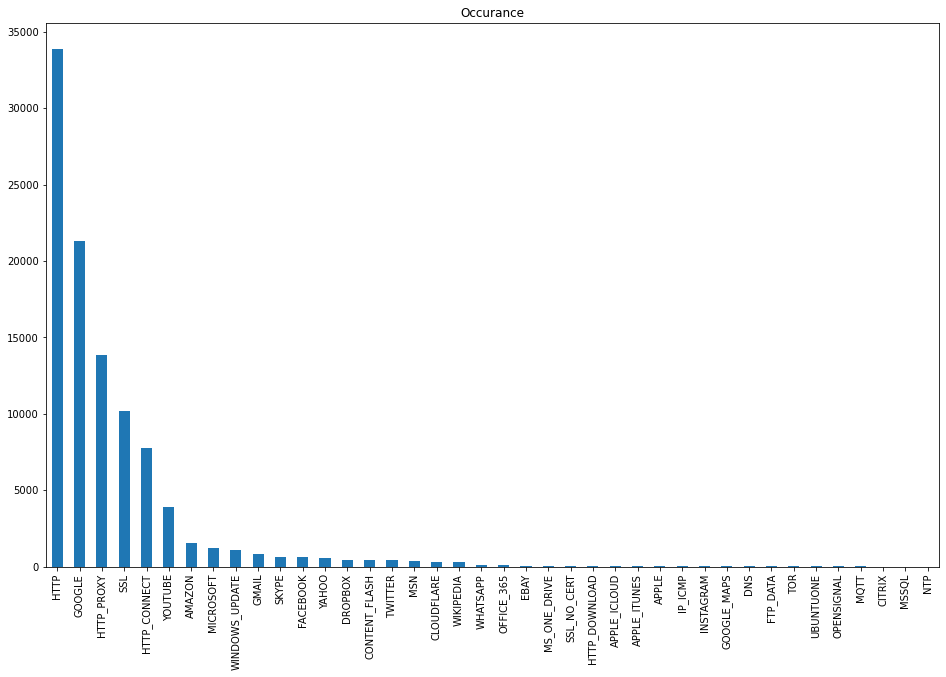

In [11]:
targetCount = dataFrame['ProtocolName'].value_counts() #Counting Orruracnes of ProtocolName
plt.figure(figsize=(16,10))
targetCount.plot(kind='bar', title='Occurance');
plt.savefig("PopularOccurances.png")
#targetCount[23:].plot(kind='bar', title='Occurance');
#plt.savefig("ModrateOccurances.png")
#targetCount[56:].plot(kind='bar', title='Occurance');
#plt.savefig("LowestOccurances.png")

In [12]:
# Removing FlowID and ProtocolName
dataFrame.drop(columns = ["Flow.ID", "ProtocolName"], inplace = True) 

In [13]:
protocolLabels = dataFrame.iloc[:,-1] #extrecting only the labels of protol occurances 
#splitting our data frame into testing and training dataframes.
x_train, x_test, y_train, y_test = train_test_split(dataFrame, protocolLabels, test_size=0.2)
#Backing Up Test and train DataSets
x_train.to_csv("xTrain.csv")
y_train.to_csv("yTrain.csv")
x_test.to_csv("xTest.csv")
y_test.to_csv("yTest.csv")

In [14]:
#Generating a classifier
classifier=RandomForestClassifier(n_estimators = 100) # n_estimators - The number of trees in the forest
classifier.fit(x_train,y_train) #Training the model
#orders or categorizes data into one or more of a set of “classes.” 

RandomForestClassifier()

In [15]:
predictions = classifier.predict(x_test) #Predicting the Protocol
predictionsDataFrame = pd.DataFrame(predictions) 
predictionsDataFrame.to_csv("Predictions.csv") #Backing up the Predictions

In [16]:
classifier.score(x_test, y_test) #Computing the accuracy 

0.9916

[[298   0   0 ...   0   0   0]
 [  1   1   0 ...   0   0   0]
 [  1   0   2 ...   0   0   0]
 ...
 [  0   0   0 ... 200   0   0]
 [  0   0   0 ...   0  85   1]
 [  0   0   0 ...   0   0 804]]


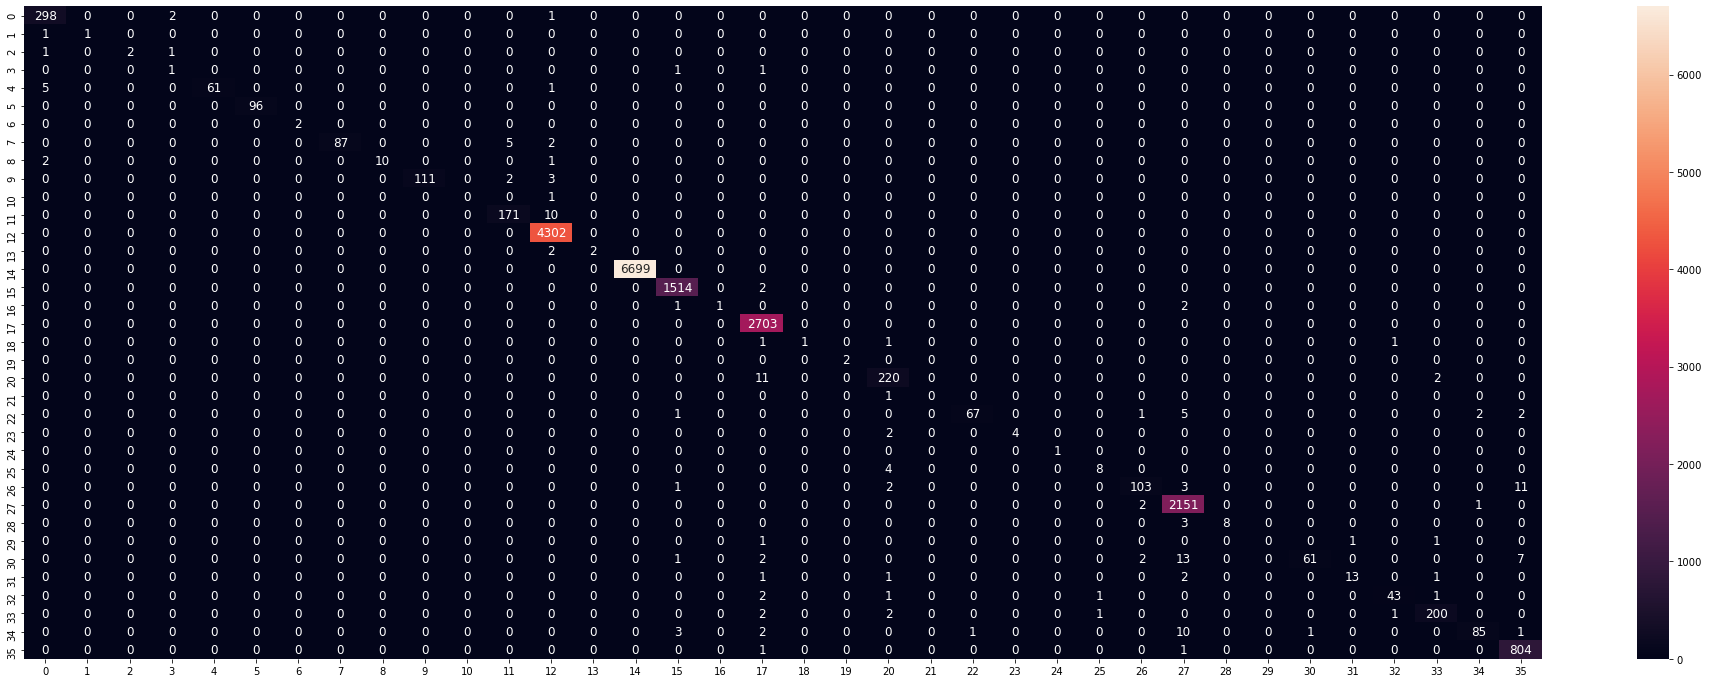

In [17]:
# Making the confusion matrix
conMat = confusion_matrix(y_true=y_test, y_pred=predictions)
confusionDataFrame = pd.DataFrame(conMat)
confusionDataFrame.to_csv("ConfusionMatrix.csv")

fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(conMat,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
plt.savefig("ConfusionMatrix.png")

print(conMat)

0    39
dtype: int32


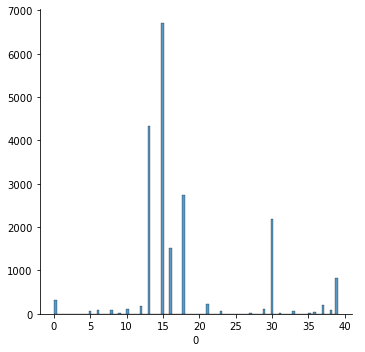

In [18]:
print(predictionsDataFrame.max())
sns.FacetGrid(predictionsDataFrame,height=5).map(sns.histplot,0).add_legend()

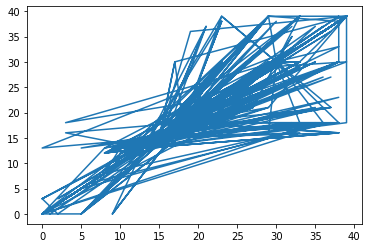

In [22]:
plt.plot(y_test,predictions)

In [23]:
data_dict = targetCount.to_dict()
print(targetCount)
string = []
for i in data_dict.keys():
    string.append(i)
wordcloud = WordCloud(width=1000, height=500, regexp=r"\w[\w' ]+").generate("+".join(string))

HTTP              33885
GOOGLE            21310
HTTP_PROXY        13822
SSL               10172
HTTP_CONNECT       7744
YOUTUBE            3929
AMAZON             1509
MICROSOFT          1241
WINDOWS_UPDATE     1081
GMAIL               822
SKYPE               639
FACEBOOK            628
YAHOO               565
DROPBOX             439
CONTENT_FLASH       418
TWITTER             405
MSN                 345
CLOUDFLARE          312
WIKIPEDIA           271
WHATSAPP             89
OFFICE_365           79
EBAY                 51
MS_ONE_DRIVE         39
SSL_NO_CERT          38
HTTP_DOWNLOAD        27
APPLE_ICLOUD         23
APPLE_ITUNES         19
APPLE                17
IP_ICMP              16
INSTAGRAM            12
GOOGLE_MAPS          11
DNS                  11
FTP_DATA              7
TOR                   5
UBUNTUONE             4
OPENSIGNAL            4
MQTT                  4
CITRIX                3
MSSQL                 2
NTP                   2
Name: ProtocolName, dtype: int64


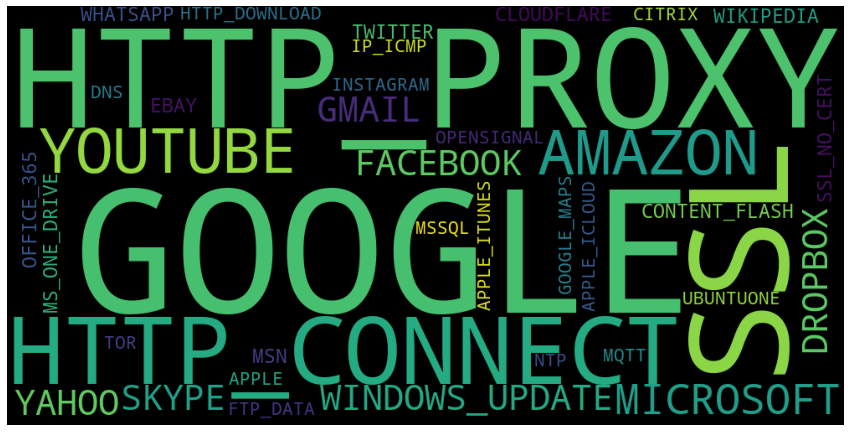

In [25]:

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()